In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [8]:
athletes= pd.read_csv("athlete_events.csv")

In [7]:
df1 = pd.read_csv("noc_regions.csv")

In [9]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
df1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [11]:
data=athletes.merge(df1, how='left',on='NOC')
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
data.rename(columns={'region':'Region','notes':'Notes'},inplace=True);

In [13]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


**Data** **cleaning**

In [14]:
data=data.drop(['ID','Name','Games','Event','City','Team'],axis=1)
data=data.drop(['Notes'],axis=1)

In [15]:
data.isnull().sum()

Sex           0
Age        3345
Height    20658
Weight    21716
NOC           0
Year          0
Season        0
Sport         0
Medal     76683
Region       72
dtype: int64

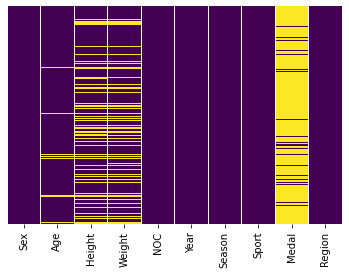

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data['Age'].fillna((data['Age'].mean()),inplace=True)
data['Height'].fillna((data['Height'].mean()),inplace=True)
data['Weight'].fillna((data['Weight'].mean()),inplace=True)

In [18]:
data['Medal']=data['Medal'].apply(lambda x:1 if str(x)!= 'nan' else 0)

In [19]:
data=data.drop(['Region'],axis=1)

In [20]:
data.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
Sport     0
Medal     0
dtype: int64

In [21]:
data.describe()

,Age,Height,Weight,Year,Medal
count,89283.000000,89283.000000,89283.000000,89283.000000,89283.000000
mean,25.625672,175.559301,70.935412,1977.741832,0.141124
std,6.331741,9.111413,12.326699,30.118858,0.348152
min,11.000000,127.000000,25.000000,1896.000000,0.000000
25%,22.000000,170.000000,64.000000,1960.000000,0.000000
50%,25.000000,175.559301,70.935412,1984.000000,0.000000
75%,28.000000,180.000000,75.000000,2002.000000,0.000000
max,88.000000,223.000000,214.000000,2016.000000,1.000000


<h1>Outlier Detection</h1>

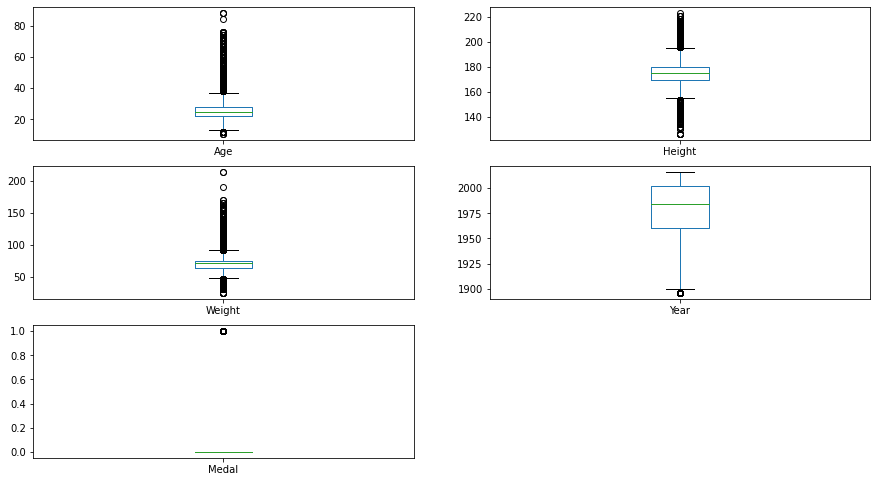

In [22]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

IQR method to remove outliers

In [23]:
Q1=data.Height.quantile(0.25)
Q3=data.Height.quantile(0.75)
Q1,Q3

(170.0, 180.0)

In [24]:
IQR=Q3-Q1
IQR

10.0

In [25]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit


(155.0, 195.0)

In [26]:
data[(data.Height<lower_limit)|(data.Height>upper_limit)]

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
158,M,21.0,198.0,90.0,ITA,2016,Summer,Rowing,1
299,M,28.0,203.0,97.0,EGY,2016,Summer,Volleyball,0
329,F,18.0,154.0,48.0,EGY,2000,Summer,Synchronized Swimming,0
330,F,22.0,154.0,48.0,EGY,2004,Summer,Synchronized Swimming,0
331,F,18.0,153.0,46.0,EGY,2000,Summer,Synchronized Swimming,0
...,...,...,...,...,...,...,...,...,...
88954,M,18.0,199.0,108.0,USA,2016,Summer,Water Polo,0
89179,M,22.0,198.0,100.0,SVK,1996,Summer,Rowing,0
89226,M,25.0,205.0,100.0,NED,2008,Summer,Rowing,0
89227,M,29.0,205.0,100.0,NED,2012,Summer,Rowing,0


In [27]:
data=data[(data.Height>lower_limit)&(data.Height<upper_limit)]



In [28]:
Q1=data.Weight.quantile(0.25)
Q3=data.Weight.quantile(0.75)
Q1,Q3

(64.0, 75.0)

In [29]:
IQR=Q3-Q1
IQR

11.0

In [30]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit


(47.5, 91.5)

In [31]:
data[(data.Weight<lower_limit)|(data.Weight>upper_limit)]

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
28,M,26.0,186.0,96.0,FIN,2002,Winter,Ice Hockey,0
57,M,31.0,189.0,130.0,FIN,2000,Summer,Athletics,0
80,F,22.0,170.0,125.0,ROU,2016,Summer,Weightlifting,0
99,M,24.0,190.0,98.0,NOR,1998,Winter,Bobsleigh,0
125,M,33.0,194.0,93.0,NOR,1936,Summer,Shooting,0
...,...,...,...,...,...,...,...,...,...
89072,M,26.0,191.0,145.0,FIN,1996,Summer,Athletics,0
89073,M,25.0,183.0,93.0,FIN,2008,Summer,Athletics,0
89092,M,27.0,182.0,103.0,KOR,1988,Summer,Wrestling,0
89184,M,37.0,188.0,102.0,ISV,1968,Summer,Sailing,0


In [32]:
data=data[(data.Weight>lower_limit)&(data.Weight<upper_limit)]



In [33]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
Q1,Q3

(22.0, 28.0)

In [34]:
IQR=Q3-Q1
IQR

6.0

In [35]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit


(13.0, 37.0)

In [36]:
data[(data.Age<lower_limit)|(data.Age>upper_limit)]

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
58,M,54.0,175.559301,70.935412,FIN,1948,Summer,Art Competitions,0
89,M,43.0,170.000000,77.000000,NOR,1968,Summer,Sailing,0
90,M,47.0,170.000000,77.000000,NOR,1972,Summer,Sailing,0
124,M,41.0,175.559301,70.935412,NOR,1936,Summer,Shooting,0
200,M,38.0,190.000000,85.000000,FRA,2008,Summer,Handball,1
...,...,...,...,...,...,...,...,...,...
88975,M,38.0,175.559301,70.935412,AUT,1956,Summer,Equestrianism,0
88976,M,38.0,175.559301,70.935412,AUT,1956,Summer,Equestrianism,0
89114,M,39.0,175.559301,70.935412,JPN,1932,Summer,Art Competitions,0
89251,M,40.0,170.000000,75.000000,EGY,2012,Summer,Shooting,0


In [37]:
data=data[(data.Age>lower_limit)&(data.Age<upper_limit)]



box plot after removing outliers

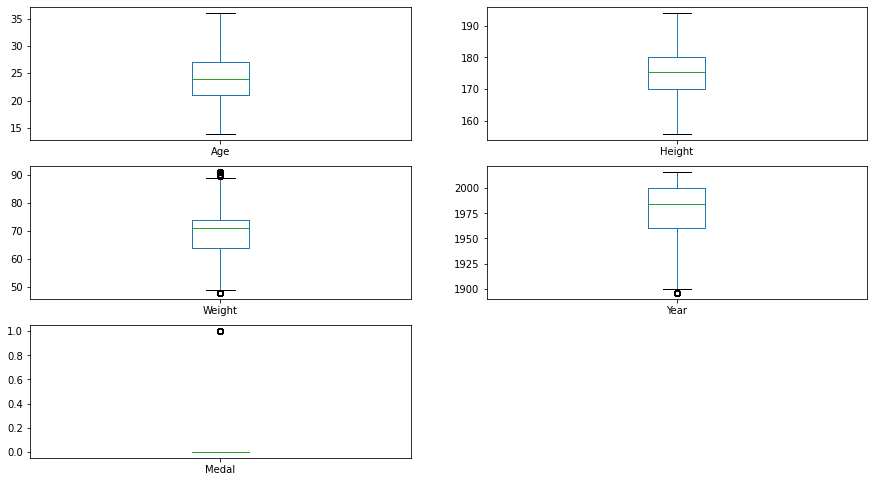

In [38]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [39]:
data.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
Sport     0
Medal     0
dtype: int64

Removing duplicates

In [40]:
data.duplicated().sum()

23233

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data.duplicated().sum()

0

In [43]:
data['Medal'].value_counts()

0    44110
1     8898
Name: Medal, dtype: int64

**visualizations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


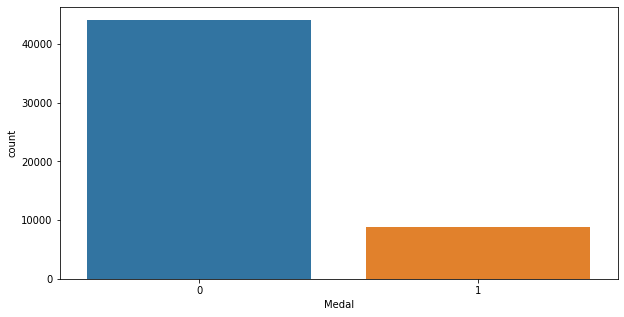

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data['Medal'], data=data)


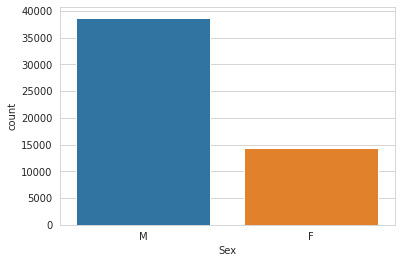

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=data)

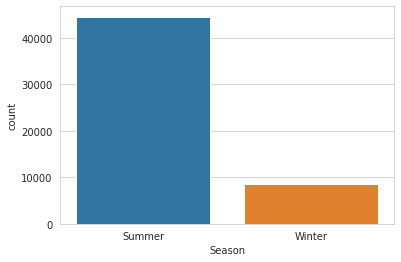

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Season',data=data)

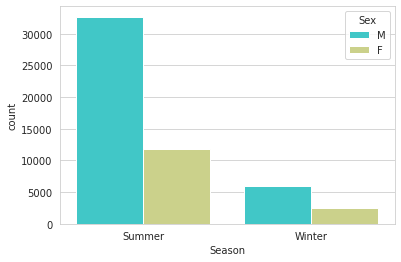

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Season',hue='Sex',data=data,palette='rainbow')

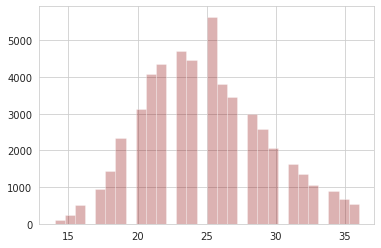

In [48]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)

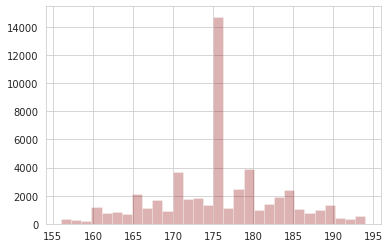

In [49]:
data['Height'].hist(bins=30,color='darkred',alpha=0.3)

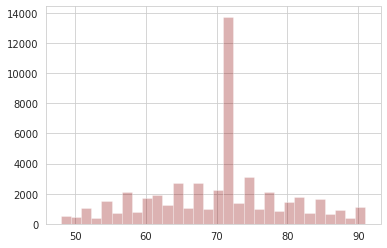

In [50]:
data['Weight'].hist(bins=30,color='darkred',alpha=0.3)

In [51]:
top_10_countries=data.NOC.value_counts().sort_values(ascending=False).head(10)
top_10_countries

USA    3838
FRA    3168
ITA    2933
GBR    2615
CAN    2054
AUS    1796
GER    1734
SWE    1538
ESP    1490
SUI    1244
Name: NOC, dtype: int64

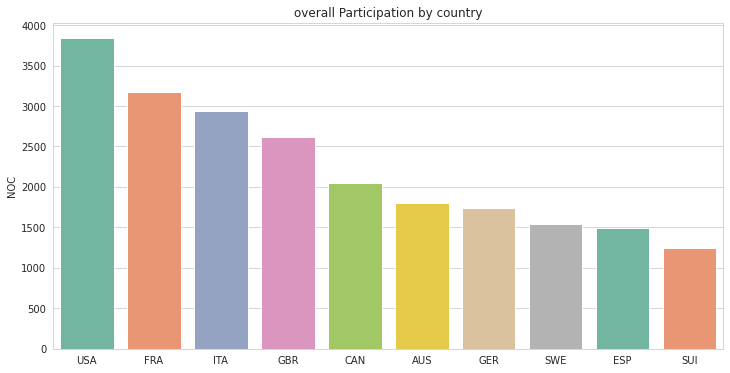

In [52]:
plt.figure(figsize=(12,6))
plt.title('overall Participation by country')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set2')

In [53]:
data.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'Sport',
       'Medal'],
      dtype='object')

<h1>Encoding</h1>

In [54]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'NOC': 228, 'Season': 2, 'Sex': 2, 'Sport': 65}

In [55]:
data.dtypes

Sex        object
Age       float64
Height    float64
Weight    float64
NOC        object
Year        int64
Season     object
Sport      object
Medal       int64
dtype: object

In [56]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x:1 if x == positive_value else 0)
    return df


def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies =pd.get_dummies(df[column],prefix=prefix)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(column,axis=1)
    return df


In [57]:
data = binary_encode(
    data,
    columns=['Sex','Season'],
    positive_values=['M','Summer'])
data = onehot_encode(
    data,
    columns=['NOC','Sport'],
    prefixes=['N','S'])

In [58]:
len(data.select_dtypes('object').columns)

0

**correlation** **matrix**

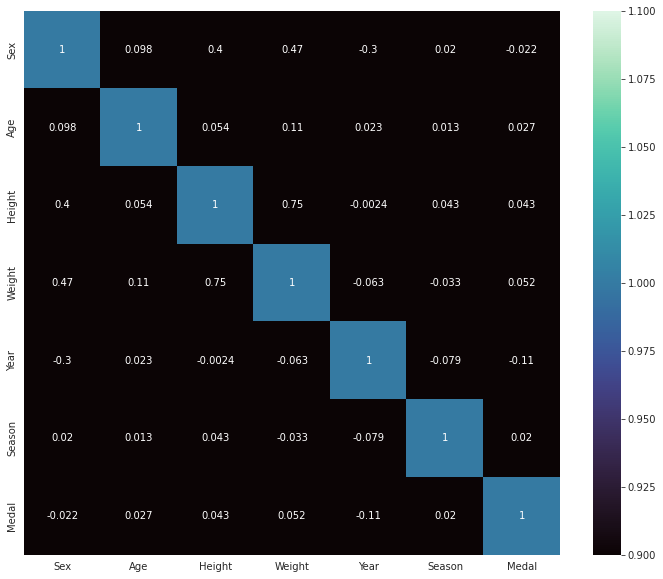

In [59]:
corr = data.loc[:,:'Medal'].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.show()

In [60]:
data.shape

(53008, 300)

In [61]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,N_AFG,N_AHO,N_ALB,N_ALG,N_AND,N_ANG,N_ANT,N_ANZ,N_ARG,N_ARM,N_ARU,N_ASA,N_AUS,N_AUT,N_AZE,N_BAH,N_BAN,N_BAR,N_BDI,N_BEL,N_BEN,N_BER,N_BHU,N_BIH,N_BIZ,N_BLR,N_BOH,N_BOL,N_BOT,N_BRA,N_BRN,N_BRU,N_BUL,...,S_Golf,S_Gymnastics,S_Handball,S_Hockey,S_Ice Hockey,S_Jeu De Paume,S_Judo,S_Lacrosse,S_Luge,S_Military Ski Patrol,S_Modern Pentathlon,S_Motorboating,S_Nordic Combined,S_Polo,S_Racquets,S_Rhythmic Gymnastics,S_Roque,S_Rowing,S_Rugby,S_Rugby Sevens,S_Sailing,S_Shooting,S_Short Track Speed Skating,S_Skeleton,S_Ski Jumping,S_Snowboarding,S_Softball,S_Speed Skating,S_Swimming,S_Synchronized Swimming,S_Table Tennis,S_Taekwondo,S_Tennis,S_Trampolining,S_Triathlon,S_Tug-Of-War,S_Volleyball,S_Water Polo,S_Weightlifting,S_Wrestling
0,1,24.0,180.000000,80.000000,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,23.0,170.000000,60.000000,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,24.0,175.559301,70.935412,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,34.0,175.559301,70.935412,1900,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,21.0,185.000000,82.000000,1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89277,0,21.0,181.000000,64.000000,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
89278,1,27.0,173.000000,61.000000,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89279,0,29.0,165.000000,52.000000,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89280,1,32.0,167.000000,72.000000,1968,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**X**-**Y** **spllit**

In [62]:
Y=data['Medal']
X=data.drop('Medal',axis=1)

In [63]:
X.shape,Y.shape

((53008, 299), (53008,))

**Normalization**

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
scaler.fit(X)
MinMaxScaler()
scaler.data_max_
scaler.transform(X)

array([[1.        , 0.45454545, 0.63157895, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.40909091, 0.36842105, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.45454545, 0.51471844, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.68181818, 0.23684211, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.81818182, 0.28947368, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5       , 0.51471844, ..., 0.        , 0.        ,
        0.        ]])

In [66]:
X.head()

,Sex,Age,Height,Weight,Year,Season,N_AFG,N_AHO,N_ALB,N_ALG,N_AND,N_ANG,N_ANT,N_ANZ,N_ARG,N_ARM,N_ARU,N_ASA,N_AUS,N_AUT,N_AZE,N_BAH,N_BAN,N_BAR,N_BDI,N_BEL,N_BEN,N_BER,N_BHU,N_BIH,N_BIZ,N_BLR,N_BOH,N_BOL,N_BOT,N_BRA,N_BRN,N_BRU,N_BUL,N_BUR,...,S_Golf,S_Gymnastics,S_Handball,S_Hockey,S_Ice Hockey,S_Jeu De Paume,S_Judo,S_Lacrosse,S_Luge,S_Military Ski Patrol,S_Modern Pentathlon,S_Motorboating,S_Nordic Combined,S_Polo,S_Racquets,S_Rhythmic Gymnastics,S_Roque,S_Rowing,S_Rugby,S_Rugby Sevens,S_Sailing,S_Shooting,S_Short Track Speed Skating,S_Skeleton,S_Ski Jumping,S_Snowboarding,S_Softball,S_Speed Skating,S_Swimming,S_Synchronized Swimming,S_Table Tennis,S_Taekwondo,S_Tennis,S_Trampolining,S_Triathlon,S_Tug-Of-War,S_Volleyball,S_Water Polo,S_Weightlifting,S_Wrestling
0,1,24.0,180.000000,80.000000,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,23.0,170.000000,60.000000,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,24.0,175.559301,70.935412,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,34.0,175.559301,70.935412,1900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,21.0,185.000000,82.000000,1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Medal, dtype: int64

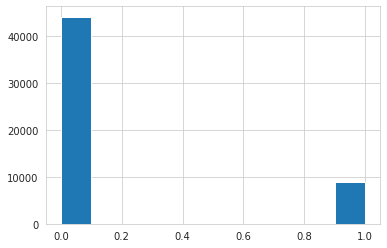

In [68]:
Y.hist()

In [69]:
Y.value_counts()

0    44110
1     8898
Name: Medal, dtype: int64

<h1>Oversampling</h1>

https://anaconda.org/conda-forge/imbalanced-learn

In [ ]:
#conda install -c conda-forge imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [71]:
sm = SMOTE( random_state=7) #k_neighbours
X_train_res, Y_train_res = sm.fit_resample(X, Y) # for new version fit_resample

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [72]:
X_train_res.shape, Y_train_res.shape

((88220, 299), (88220,))

In [73]:
len(Y_train_res[Y_train_res==0]),len(Y_train_res[Y_train_res==1]) 

(44110, 44110)

<h1>Train Test Split</h1>

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train_res,Y_train_res,test_size = 0.3, random_state=7)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(61754, 299) (26466, 299) (61754,) (26466,)


<h1>Random Forest</h1>

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc=RandomForestClassifier(random_state=7)

In [78]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [79]:
Y_pred = rfc.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [81]:
cf_mat=confusion_matrix(Y_test,Y_pred)


In [82]:
acc = accuracy_score(Y_test,Y_pred)

In [83]:
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[12334   945]
 [ 1654 11533]]
Accuracy :  0.90179853396811


In [84]:
np.mean((Y_test-Y_pred)**2)

0.09820146603188998

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(Y_test,Y_pred)

0.09820146603188998

<h1>FINETUNE RANDOM FOREST<h1>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
param_grid = { 
    'n_estimators': [20,50,100],
    }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=7)


In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,\
                      cv= 2, verbose=2)

In [ ]:
CV_rfc.fit(X_train, Y_train)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] n_estimators=20 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=20, total=  10.5s
[CV] n_estimators=20 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] .................................. n_estimators=20, total=  10.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  24.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  25.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  50.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  50.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.cv_results_['mean_test_score'])
print(sum(CV_rfc.cv_results_['mean_test_score'])/ len(CV_rfc.cv_results_['mean_test_score']))

{'n_estimators': 100}
[0.89812979 0.90014608 0.90092927]
0.8997350469772689


In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=7)

In [ ]:
rfc.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred = rfc.predict(X_train)


In [ ]:
cf_mat=confusion_matrix(Y_train,Y_pred)

In [ ]:
acc = accuracy_score(Y_train,Y_pred)

In [ ]:
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[88802  1336]
 [ 2383 87512]]
Accuracy :  0.9793426760649436


<h1>SVM<h1>

In [ ]:
from sklearn.svm import SVC # SVR

In [ ]:
model = SVC()
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)

In [ ]:
acc = accuracy_score(Y_test,Y_predict)

In [ ]:
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

Confusion Matrix 
 [[66305     0     0     0]
 [ 3902     0     0     0]
 [ 3877     0     0     0]
 [ 3874     0     0     0]]
Accuracy :  0.8505220759896355


<h1>KNN</h1>

In [80]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [81]:
Y_pred= classifier.predict(X_test) 

In [82]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score  
cm= confusion_matrix(Y_test, Y_pred)  

In [83]:
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[2217 1019]
 [ 250 3093]]


In [84]:
acc = accuracy_score(Y_test,Y_pred)

In [85]:
print("Accuracy : ",acc)

Accuracy :  0.8071135430916553


<h1>Logistic Regression<h1>

In [89]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [88]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score  
cm= confusion_matrix(Y_test, Y_pred)    

In [92]:
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[12334   945]
 [ 1654 11533]]


In [93]:
acc = accuracy_score(Y_test,Y_pred)

In [94]:
print("Accuracy : ",acc)

Accuracy :  0.90179853396811


**Roc** **curve**

In [95]:
rfc.predict_proba(X_test)

array([[0.67833333, 0.32166667],
       [0.        , 1.        ],
       [0.97333333, 0.02666667],
       ...,
       [0.        , 1.        ],
       [0.91333333, 0.08666667],
       [0.97      , 0.03      ]])

In [96]:
rfc.predict_proba(X_test)[:,1]

array([0.32166667, 1.        , 0.02666667, ..., 1.        , 0.08666667,
       0.03      ])

In [97]:
from sklearn.metrics import roc_curve
roc_curve(Y_test, rfc.predict_proba(X_test)[:,1])

(array([0.00000000e+00, 4.51841253e-04, 4.51841253e-04, ...,
        9.49469087e-01, 9.49544393e-01, 1.00000000e+00]),
 array([0.        , 0.24357322, 0.24387655, ..., 0.99893835, 0.99893835,
        1.        ]),
 array([2.    , 1.    , 0.998 , ..., 0.0025, 0.002 , 0.    ]))

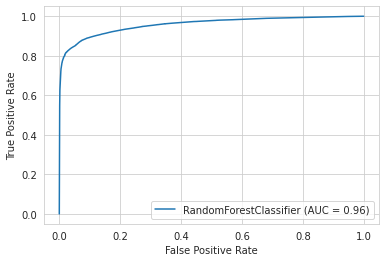

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, X_test, Y_test)

#K-fold Cross Validation

In [99]:
from sklearn.model_selection import KFold
model=RandomForestClassifier()
kfold_validation=KFold(10)

In [100]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.88794567 0.86511979 0.85512168 0.8604037  0.87134503 0.87191096
 0.85493303 0.86096963 0.85396226 0.84207547]
0.8623787217079013


**Result**

In [107]:
Y_true = np.array(Y_test)
Y_pred = np.squeeze(np.array(rfc.predict(X_test) >= 0.5, dtype=np.int))

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     13279
           1       0.92      0.87      0.90     13187

    accuracy                           0.90     26466
   macro avg       0.90      0.90      0.90     26466
weighted avg       0.90      0.90      0.90     26466



In [105]:
x=['RFC','LR','Svm','KNN']
y = [97.93,90.71,85.05,80.71]

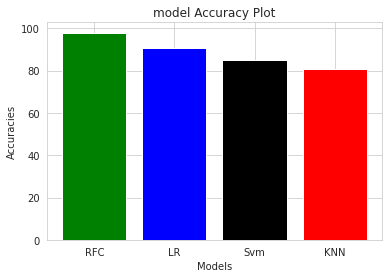

In [106]:
plt.bar(x,y,color=['green', 'blue', 'black', 'red'])
plt.xlabel('Models')
plt.ylabel("Accuracies")
plt.title('model Accuracy Plot')
plt.show()

In [102]:
import pickle

In [103]:
with open('model_pickle','wb') as file:
    pickle.dump(rfc,file)

In [104]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)